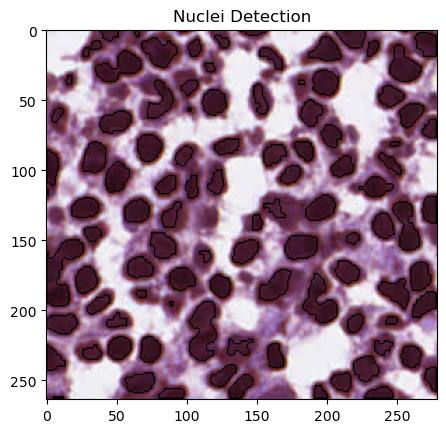

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the H&E stained image
hematoxylin_and_eosin_img = cv2.imread('/home/snucse/Downloads/SET-13/Image.png',cv2.COLOR_BGR2RGB)

# Convert the image to grayscale
gray_img = cv2.cvtColor(hematoxylin_and_eosin_img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to the grayscale image
blurred_img = cv2.GaussianBlur(gray_img, (3, 3), 1)  # You can adjust the kernel size (here it's 5x5) as needed

# Separate the hematoxylin (blue) channel
hematoxylin_channel = hematoxylin_and_eosin_img[:, :, 0]

# Thresholding to segment nuclei
_, nucleus_mask = cv2.threshold(hematoxylin_channel, 85, 135, cv2.THRESH_BINARY_INV)

# Perform morphological operations to clean up the nucleus mask
kernel = np.ones((3,3), np.uint8)
nucleus_mask = cv2.morphologyEx(nucleus_mask, cv2.MORPH_OPEN, kernel)
nucleus_mask = cv2.morphologyEx(nucleus_mask, cv2.MORPH_CLOSE, kernel)


# Find contours of nuclei
contours, _ = cv2.findContours(nucleus_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image
nuclei_img = hematoxylin_and_eosin_img.copy()
cv2.drawContours(nuclei_img, contours, -1, (0, 0, 0), 1)

# Create a black background image
black_background = np.zeros_like(nuclei_img)

# Combine the black background with the nuclei contours
result_img = cv2.addWeighted(black_background, 0.0, nuclei_img, 1.0, 0.0)

# Display the image with nuclei contours using Matplotlib
plt.imshow(result_img)
plt.title('Nuclei Detection')
plt.show()


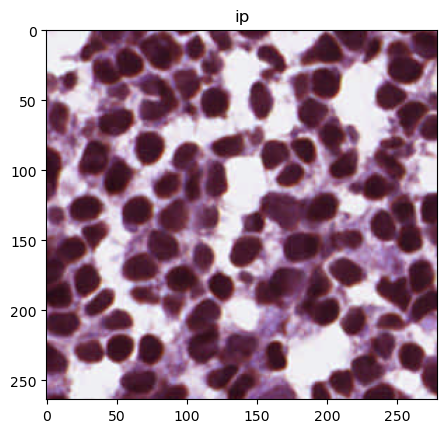

In [ ]:
plt.imshow(hematoxylin_and_eosin_img)
plt.title('ip')
plt.show()

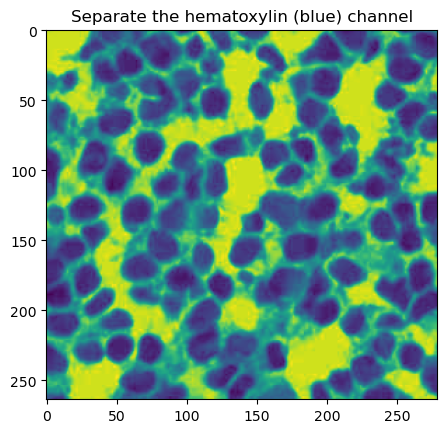

In [ ]:
plt.imshow(hematoxylin_and_eosin_img[:, :, 0])
plt.title('Separate the hematoxylin (blue) channel')
plt.show()

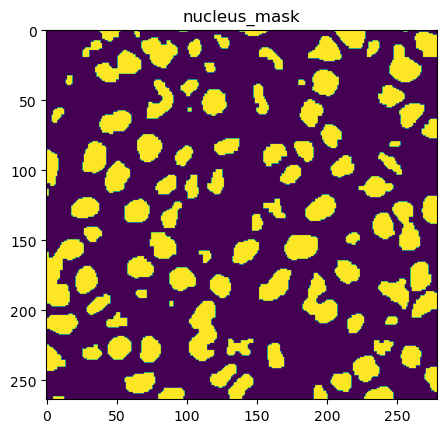

In [ ]:
plt.imshow(nucleus_mask)
plt.title('nucleus_mask')
plt.show()